## Let’s analyze the data structure: outliers, distributions, and key patterns

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../datasets/ab-test.csv")
del df['uid']
print(df)

          diff    time    group
0  -103.333333   after     test
1    -6.000000  before     test
2   -10.000000   after     test
3    -3.500000  before     test
4   -82.333333   after     test
5  -148.000000  before     test
6   -78.500000   after     test
7  -112.500000  before     test
8  -127.500000   after     test
9   -69.333333  before     test
10 -136.500000   after     test
11  -53.000000  before     test
12 -158.500000   after     test
13  -70.000000  before     test
14  -75.000000   after  control
15 -103.000000  before  control
16  -81.500000   after  control
17  -15.500000  before  control
18  -32.000000   after  control
19   -3.000000  before  control
20   17.500000   after  control
21 -153.000000  before  control
22  -94.000000   after  control
23 -202.000000  before  control
24  -49.000000   after  control
25  -16.000000  before  control
26 -131.666667   after  control
27 -156.000000  before  control
28 -322.666667   after  control
29  -75.000000  before  control
30  -77.

#### Make some modifications

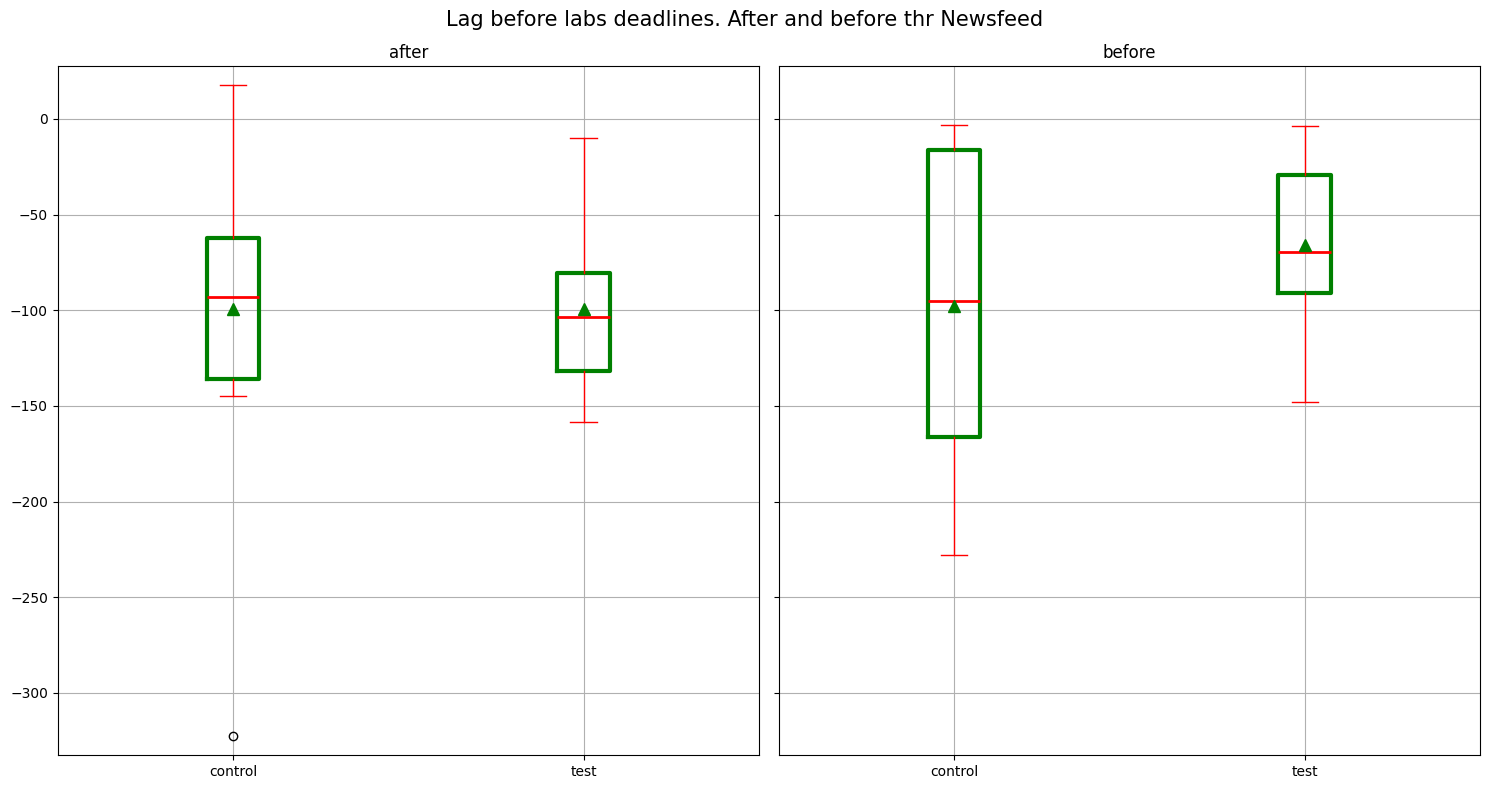

In [ ]:
before = df[df['time'] == 'before']
before_test = before[before['group'] == 'test']
#print(before_test)

before_control= before[before['group'] == 'control']
#print(before_control)
after = df[df['time'] == 'after']
after_test = after[after['group'] == 'test']
#print(after_test)
after_control= after[after['group'] == 'control']
#print(after_control)
max_len_b = max(len(before_test), len(before_control))
df_before = pd.DataFrame({'test': before_test['diff'].reset_index(drop=True).reindex(range(max_len_b)), 'control': before_control['diff'].reset_index(drop=True).reindex(range(max_len_b))})
df_after = pd.DataFrame({'test': after_test['diff'].reset_index(drop=True).reindex(range(max_len_b)), 'control': after_control['diff'].reset_index(drop=True).reindex(range(max_len_b))})
#print(df_after)
#print(df_before)
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
df_after.boxplot(
    column=['control', 'test'],
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='red'),
    boxprops = dict(linewidth=3, color='green'),
    capprops = dict(linestyle='-', linewidth=1, color='red'),
    showmeans=True,
    meanprops={'marker':'^', 'markerfacecolor':'green', 'markeredgecolor':'green', 'markersize':8}           
    )  
plt.title('after')

plt.subplot(1,2,2)
df_before.boxplot(column=['control', 'test'],
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='red'),
    boxprops = dict(linewidth=3, color='green'),
    capprops = dict(linestyle='-', linewidth=1, color='red'),
    showmeans=True,
    meanprops={'marker':'^', 'markerfacecolor':'green', 'markeredgecolor':'green', 'markersize':8}                         
    )  
plt.title('before')
plt.suptitle('Lag before labs deadlines. After and before the Newsfeed', fontsize=15)
plt.xlim()


y_min = min(df_before.min().min(), df_after.min().min()) - 10
y_max = max(df_before.max().max(), df_after.max().max()) + 10
plt.subplot(1, 2, 1).set_ylim(y_min, y_max)
plt.subplot(1, 2, 2).set_ylim(y_min, y_max)
plt.subplot(1,2,2).set_yticklabels([])
plt.tight_layout()
plt.show()